# NNDL HW1
## sajjad pakdaman savoji
### 810195517

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sgn(x):
    return x>= 0

In [3]:
class MCNeuron(object):
    def __init__(self,  w , x):
        self.w = w
        self.x = x
    def out(self):
        return sgn(np.dot(self.w , [i.out() for i in self.x]))
class Input(object):
    def __init__(self , value):
        self.value = value
    def out(self):
        return self.value
    def set_value(self , new_val):
        self.value = new_val

In [4]:
class Adder(object):
    def __init__(self):
        self.a0   = Input(0)
        self.a1   = Input(0)
        self.ca   = Input(0)
        self.bias = Input(1)
        self.carry = MCNeuron(np.array([1, 1, 1, -2]), [self.a0, self.a1, self.ca, self.bias])
        self.s = MCNeuron(np.array([1, 1, 1, -2, -1]), [self.a0, self.a1, self.ca, self.carry, self.bias])

    def set_value(self, x):
        '''
            x should contain 3 bools
            x[0] and x[1] denotes bits to be added
            x[2] denotes carry_in
        '''
        self.a0.set_value(x[0])
        self.a1.set_value(x[1])
        self.ca.set_value(x[2])
    def out(self):
        '''
        ret[0] denotes sum
        ret[1] denotes carry_out
        '''
        return self.s.out() , self.carry.out()

In [5]:
class Nadder(object):
    def __init__(self , n):
        self.n = n
        self.adders = [Adder() for i in range(self.n)]
    
    def add(self, x , y):
        assert(len(x) == self.n)
        assert(len(y) == self.n)

        res = np.zeros(len(x))
        c = 0
        for i , adder in enumerate(self.adders):
            adder.set_value([x[i], y[i], c])
            res[i] , c = adder.out()
        return res , c

In [6]:
nadder = Nadder(2)
for x1 in range(2):
    for x0 in range(2):
        for y1 in range(2):
            for y0 in range(2):
                x = np.array([x0 , x1])
                y = np.array([y0 , y1])
                res , carry = nadder.add(x, y)
                print(x[::-1], '+', y[::-1], '=', int(carry), res[::-1])

[0 0] + [0 0] = 0 [0. 0.]
[0 0] + [0 1] = 0 [0. 1.]
[0 0] + [1 0] = 0 [1. 0.]
[0 0] + [1 1] = 0 [1. 1.]
[0 1] + [0 0] = 0 [0. 1.]
[0 1] + [0 1] = 0 [1. 0.]
[0 1] + [1 0] = 0 [1. 1.]
[0 1] + [1 1] = 1 [0. 0.]
[1 0] + [0 0] = 0 [1. 0.]
[1 0] + [0 1] = 0 [1. 1.]
[1 0] + [1 0] = 1 [0. 0.]
[1 0] + [1 1] = 1 [0. 1.]
[1 1] + [0 0] = 0 [1. 1.]
[1 1] + [0 1] = 1 [0. 0.]
[1 1] + [1 0] = 1 [0. 1.]
[1 1] + [1 1] = 1 [1. 0.]


In [87]:
np.random.seed(2)
data =  np.random.normal(0, 0.5, (100, 2))
m1   = np.array([1 , 1])
X    = data + m1

data =  np.random.normal(0, 0.5, (100, 2))
m2   = np.array([-1 , -1])
Y    = data + m2


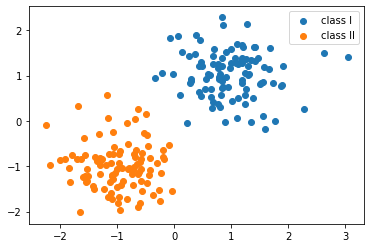

In [88]:
plt.scatter(X[: , 0]  ,X[:, 1], label = 'class I')
plt.scatter(Y[: , 0]  ,Y[:, 1], label = 'class II')
plt.legend()

In [89]:
x_target = np.atleast_2d([1 for i in range(100)]).T
y_target = np.atleast_2d([-1 for i in range(100)]).T


Data   = np.hstack((np.vstack((X, Y)) , np.ones((200, 1))))
target = np.vstack((x_target, y_target))
W = np.zeros(3)

In [90]:
def sign(x):
    return 2*(x>=0)-1

class PNeuron(object):
    def __init__(self, act_function, W, lr = 0.2, max_epoch = 10000):
        self.act = act_function
        self.W = W
        self.lr = lr
        self.max_epoch = max_epoch
        self.count = 0

    def out(self, Data):
        return self.act(np.dot(Data, self.W))
    
    def is_fit(self, Data, target):
        if self.count >= self.max_epoch:
            return True
        res = self.out(Data).reshape(target.shape)
        return np.array_equal(res, target)

    def update(self, Data, target):
        mask = [i for i in range(Data.shape[0])]
        # np.random.shuffle(mask)
        for sample in mask:
            if not self.out(Data[sample, :]) == target[sample, :][0]:
                self.W = self.W + self.lr * target[sample, :] * Data[sample, :]
        self.count += 1

    def get_weights(self):
        return self.W
        

In [114]:
class Adeline(PNeuron):
    def __init__(self, act_function, W, lr = 0.01, max_epoch = 10000):
        super().__init__(act_function, W, lr = lr, max_epoch = max_epoch)
        self.best_cost = float('inf')
        self.best_w = None

    def update(self, Data, target):
        mask = [i for i in range(Data.shape[0])]
        # np.random.shuffle(mask)
        for sample in mask:
                self.W = self.W + self.lr * (target[sample, :][0] - self.net(Data[sample, :]))* Data[sample, :]
        self.count += 1

        res = self.out(Data).reshape(target.shape)
        cost = np.square(np.subtract(res,target)).mean() 
        if cost < self.best_cost:
            self.best_cost = cost
            self.best_w = self.W
        
    def is_fit(self, Data, target):
        if self.count >= self.max_epoch:
            return True
        return False
    
    def net(self, Data):
        return np.dot(Data, self.W)

    def get_weights(self):
        return self.best_w 

In [92]:
neuron = PNeuron(sign, W)
while(not neuron.is_fit(Data, target)):
    neuron.update(Data, target)

In [93]:
w_star = neuron.get_weights()

Text(0.5, 1.0, 'Perceptron')

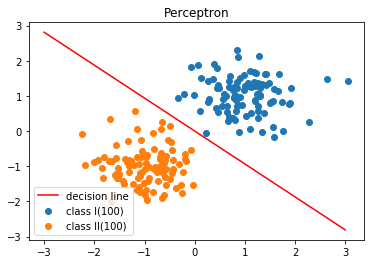

In [94]:
x1 = 3
y1 = (-w_star[2]-w_star[0]*x1)/w_star[1]

x2 = -3
y2 = (-w_star[2]-w_star[0]*x2)/w_star[1]

plt.scatter(X[: , 0]  ,X[:, 1], label = 'class I(100)')
plt.scatter(Y[: , 0]  ,Y[:, 1], label = 'class II(100)')
plt.plot([x1 , x2], [y1, y2] , c= 'red', label = 'decision line')
plt.legend()
plt.title('Perceptron')

In [98]:
neuron = Adeline(sign, W, lr=0.01, max_epoch= 20000)
while(not neuron.is_fit(Data, target)):
    neuron.update(Data, target)

In [99]:
w_star = neuron.get_weights()

Text(0.5, 1.0, 'Adeline')

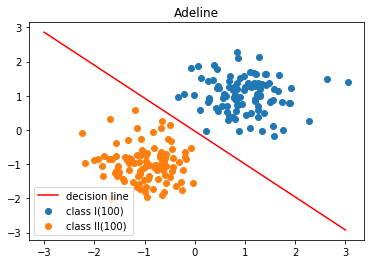

In [100]:
x1 = 3
y1 = (-w_star[2]-w_star[0]*x1)/w_star[1]

x2 = -3
y2 = (-w_star[2]-w_star[0]*x2)/w_star[1]

plt.scatter(X[: , 0]  ,X[:, 1], label = 'class I(100)')
plt.scatter(Y[: , 0]  ,Y[:, 1], label = 'class II(100)')
plt.plot([x1 , x2], [y1, y2] , c= 'red', label = 'decision line')
plt.legend()
plt.title('Adeline')

In [105]:
np.random.seed(17)
data =  np.random.normal(0, 0.5, (100, 2))
m1   = np.array([1 , 1])
X    = data + m1

data =  np.random.normal(0, 0.5, (10, 2))
m2   = np.array([-1 , -1])
Y    = data + m2


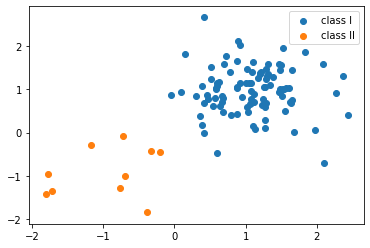

In [106]:
plt.scatter(X[: , 0]  ,X[:, 1], label = 'class I')
plt.scatter(Y[: , 0]  ,Y[:, 1], label = 'class II')
plt.legend()

In [107]:
x_target = np.atleast_2d([1 for i in range(100)]).T
y_target = np.atleast_2d([-1 for i in range(10)]).T


Data   = np.hstack((np.vstack((X, Y)) , np.ones((110, 1))))
target = np.vstack((x_target, y_target))
W = np.zeros(3)

In [124]:
neuron = PNeuron(sign, W, lr=1)
while(not neuron.is_fit(Data, target)):
    neuron.update(Data, target)

In [125]:
w_star = neuron.get_weights()

Text(0.5, 1.0, 'Perceptron')

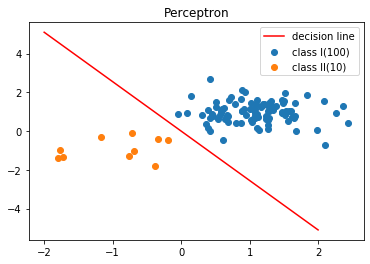

In [126]:
x1 = 2
y1 = (-w_star[2]-w_star[0]*x1)/w_star[1]

x2 = -2
y2 = (-w_star[2]-w_star[0]*x2)/w_star[1]

plt.scatter(X[: , 0]  ,X[:, 1], label = 'class I(100)')
plt.scatter(Y[: , 0]  ,Y[:, 1], label = 'class II(10)')
plt.plot([x1 , x2], [y1, y2] , c= 'red', label = 'decision line')
plt.legend()
plt.title('Perceptron')

In [127]:
neuron = Adeline(sign, W, lr= 1)
while(not neuron.is_fit(Data, target)):
    neuron.update(Data, target)

/home/savoji/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in add
  # This is added back by InteractiveShellApp.init_path()
/home/savoji/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


In [128]:
w_star = neuron.get_weights()

Text(0.5, 1.0, 'Adeline')

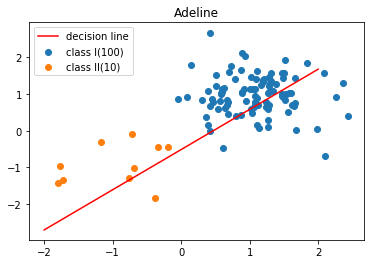

In [129]:
x1 = 2
y1 = (-w_star[2]-w_star[0]*x1)/w_star[1]

x2 = -2
y2 = (-w_star[2]-w_star[0]*x2)/w_star[1]

plt.scatter(X[: , 0]  ,X[:, 1], label = 'class I(100)')
plt.scatter(Y[: , 0]  ,Y[:, 1], label = 'class II(10)')
plt.plot([x1 , x2], [y1, y2] , c= 'red', label = 'decision line')
plt.legend()
plt.title('Adeline')